In [1312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [1313]:
data = pd.read_excel("data.xlsx")

## Data Description

In [1314]:
df = data.copy()
df = df.iloc[1:,20:] # Reducing the columns 
df.head(2)


,This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:,This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:,This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:,I find this scenario useful:After looking at the pictures please rate the following statements:,Total Usefulnes - RSS,The shown scenario is enjoyable:After looking at the pictures please rate the following statements:,The shown scenario is pleasing:After looking at the pictures please rate the following statements:,This scenario is entertaining:After looking at the pictures please rate the following statements:,Total Enjoyment - RSS,The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:,...,Income SPSS,"In the past 30 days, how frequently did you go shopping?",Shopping Type,What is your highest education level?,Eductaion SPSS,In What country do you currently reside?,Country SPSS,Other - Write In:In What country do you currently reside?,How satisfied are you with our survey?,UID
1,3,3,4,3,3.25,1,1,3,1.666667,3,...,2.0,Not at all frequently,1.0,Completed secondary education (graduated high ...,2.0,Germany,0.0,NaN,NaN,1.0
2,5,5,5,5,5,5,5,5,5,5,...,3.0,Moderately frequently,3.0,Some secondary education (high school),1.0,Germany,0.0,NaN,NaN,2.0


In [1315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 1 to 315
Columns: 103 entries, This scenario can improve my shopping performance:After looking at the pictures please rate the following statements: to UID
dtypes: float64(9), object(94)
memory usage: 253.6+ KB


Data Shape = (315, 123)

In [1316]:
df.describe().T
#description numerical data

,count,mean,std,min,25%,50%,75%,max
Presentation of our Augmented Reality Shopping Application:,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What is your age?,315.0,37.085714,11.423616,18.0,28.0,35.0,44.0,69.0
Gender SPSS,19.0,0.473684,0.512989,0.0,0.0,0.0,1.0,1.0
Income SPSS,19.0,3.105263,1.523692,1.0,2.0,3.0,4.0,7.0
Shopping Type,19.0,2.789474,1.084176,1.0,2.0,3.0,3.0,5.0
Eductaion SPSS,19.0,2.842105,0.958190,1.0,2.0,3.0,4.0,4.0
Country SPSS,19.0,0.263158,0.561951,0.0,0.0,0.0,0.0,2.0
How satisfied are you with our survey?,303.0,3.557756,0.854941,1.0,3.0,4.0,4.0,5.0
UID,315.0,158.000000,91.076891,1.0,79.5,158.0,236.5,315.0


In [1317]:
df.describe(include = "O").T
#description categorical data

,count,unique,top,freq
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:,315,5,3,141
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:,315,5,3,134
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:,315,5,3,138
I find this scenario useful:After looking at the pictures please rate the following statements:,315,5,3,146
Total Usefulnes - RSS,121.0,16.0,3.0,30.0
...,...,...,...,...
What is your approximate average net income per month?,315,10,<1000€,74
"In the past 30 days, how frequently did you go shopping?",315,5,Moderately frequently,144
What is your highest education level?,315,4,Some undergraduate education (college or unive...,120
In What country do you currently reside?,315,4,Germany,287


In [1318]:
df.isnull().sum()

This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:         0
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:       0
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:      0
I find this scenario useful:After looking at the pictures please rate the following statements:                               0
Total Usefulnes - RSS                                                                                                       194
                                                                                                                           ... 
In What country do you currently reside?                                                                                      0
Country SPSS                                                                                            

## Data Preprocessing

### Deal with missing values

In [1319]:
df.isnull().sum().values

array([  0,   0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,
         0,   0,   0, 194,   0,   0,   0,   0, 194,   0,   0,   0,   0,
       194,   0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,
         0,   0,   0,   0, 194,   0,   0,   0,   0,   0,   0, 194,   0,
         0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,   0,
         0,   0, 194,   0,   0,   0,   0, 194,   0,   0,   0,   0,   0,
         0, 194, 315,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
       296,   0, 296,   0, 296,   0, 296,   0, 296, 314,  12,   0],
      dtype=int64)

In [1320]:
df.isnull().sum().values
todelete_index = []
tofill_index = []
for index, values in enumerate(df.isnull().sum().values):
    if values > 310:
        todelete_index.append(index)
    if values < 20 and values > 0:
        tofill_index.append(index)

for i in tofill_index:
    if df.iloc[:,i].dtype == 'O':
        df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].value_counts().values[0])
    if df.iloc[:,i].dtype == 'float64':
        df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())

#rare missing values has been filled with mode and median values

df.drop(df.iloc[:,todelete_index].columns,axis=1,inplace=True)
# Deleted columns which has the all rows are null values

In [1321]:
df.isnull().sum().values #numbers of missing values

array([  0,   0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,
         0,   0,   0, 194,   0,   0,   0,   0, 194,   0,   0,   0,   0,
       194,   0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,
         0,   0,   0,   0, 194,   0,   0,   0,   0,   0,   0, 194,   0,
         0,   0,   0, 194,   0,   0,   0, 194,   0,   0,   0, 194,   0,
         0,   0, 194,   0,   0,   0,   0, 194,   0,   0,   0,   0,   0,
         0, 194,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 296,
         0, 296,   0, 296,   0, 296,   0, 296,   0,   0], dtype=int64)

In [1322]:
#other many missings

In [1323]:
list_of_missings = []
for i,val in enumerate(df.isnull().sum().values):
    if val>1:
        list_of_missings.append(i)

missing_df = df.iloc[:,list_of_missings]
missing_df.head()

,Total Usefulnes - RSS,Total Enjoyment - RSS,Total Information - RSS,Total Irritation - RSS,Total Purchase Intention - RSS,Total Usefulnes - ARSS,Total Entertainment - ARSS,Total Information - ARSS,Total Irritation -ARSS,Total Purchase Intention - ARSS,...,Total Entertainment - EARSS,Total Information - EARSS,Total Irritation - EARSS,Total Purchase Intention - EARSS,Total Trust in Application - EARSS,Gender SPSS,Income SPSS,Shopping Type,Eductaion SPSS,Country SPSS
1,3.25,1.666667,3,1,3.75,1,1,1.666667,5,1,...,1,1.666667,5,1,2,1.0,2.0,1.0,2.0,0.0
2,5,5,5,2.333333,4.25,4.75,5,5,2.333333,4.25,...,5,5,2.333333,4.25,4.833333,0.0,3.0,3.0,1.0,0.0
3,3.25,3.666667,3.333333,2,4.25,3.75,2.333333,4,3,2,...,3,3.666667,3,2.5,3.333333,1.0,1.0,3.0,2.0,0.0
4,2.25,1,2,3,3,1.5,1,1,5,1,...,1,1,5,1,1.666667,0.0,5.0,3.0,3.0,0.0
5,3,3,3,1,3.75,3.25,4,3.333333,1.333333,3.5,...,2,3,3.666667,2.75,2.833333,0.0,3.0,1.0,2.0,0.0


In [1324]:
for i in missing_df.columns:
    
    missing_df[i] = missing_df[i].apply(lambda x:np.around(x,2)) 
    print(i, missing_df[i].values[0])

Total Usefulnes - RSS 3.25
Total Enjoyment - RSS 1.67
Total Information - RSS 3.0
Total Irritation - RSS 1.0
Total Purchase Intention - RSS 3.75
Total Usefulnes - ARSS 1.0
Total Entertainment - ARSS 1.0
Total Information - ARSS 1.67
Total Irritation -ARSS 5.0
Total Purchase Intention - ARSS 1.0
Total Trust in Application - ARSS 2.0
Total Usefulnes - EARSS 1.0
Total Entertainment - EARSS 1.0
Total Information - EARSS 1.67
Total Irritation - EARSS 5.0
Total Purchase Intention - EARSS 1.0
Total Trust in Application - EARSS 2.0
Gender SPSS 1.0
Income SPSS 2.0
Shopping Type 1.0
Eductaion SPSS 2.0
Country SPSS 0.0


### İmputing missing values with KNN imputer

In [1325]:
from sklearn.impute import KNNImputer
X = missing_df.values
imputer = KNNImputer()
imputer.fit(X)
Xtrans = imputer.transform(X)
np.ceil(Xtrans)
filled_df = pd.DataFrame(columns=missing_df.columns, data = np.ceil(Xtrans))
filled_df

,Total Usefulnes - RSS,Total Enjoyment - RSS,Total Information - RSS,Total Irritation - RSS,Total Purchase Intention - RSS,Total Usefulnes - ARSS,Total Entertainment - ARSS,Total Information - ARSS,Total Irritation -ARSS,Total Purchase Intention - ARSS,...,Total Entertainment - EARSS,Total Information - EARSS,Total Irritation - EARSS,Total Purchase Intention - EARSS,Total Trust in Application - EARSS,Gender SPSS,Income SPSS,Shopping Type,Eductaion SPSS,Country SPSS
0,4.0,2.0,3.0,1.0,4.0,1.0,1.0,2.0,5.0,1.0,...,1.0,2.0,5.0,1.0,2.0,1.0,2.0,1.0,2.0,0.0
1,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,3.0,5.0,...,5.0,5.0,3.0,5.0,5.0,0.0,3.0,3.0,1.0,0.0
2,4.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,3.0,2.0,...,3.0,4.0,3.0,3.0,4.0,1.0,1.0,3.0,2.0,0.0
3,3.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,5.0,1.0,...,1.0,1.0,5.0,1.0,2.0,0.0,5.0,3.0,3.0,0.0
4,3.0,3.0,3.0,1.0,4.0,4.0,4.0,4.0,2.0,4.0,...,2.0,3.0,4.0,3.0,3.0,0.0,3.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,1.0,4.0,3.0,3.0,1.0
311,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,1.0,4.0,3.0,3.0,1.0
312,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,1.0,4.0,3.0,3.0,1.0
313,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,1.0,4.0,3.0,3.0,1.0


In [1326]:
df.update(filled_df)

In [1327]:
df.isnull().sum().values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [1328]:
one_missings = [ ]

for index, values in enumerate(df.isnull().sum().values):
    if values == 1:
        one_missings.append(index)
#imputing missings where data has 1 missing
for i in one_missings:
    if df.iloc[:,i].dtype == 'O':
        df.iloc[:,i] = df.iloc[:,i].fillna(1)
    if df.iloc[:,i].dtype == 'float64':
        df.iloc[:,i] = df.iloc[:,i].fillna(1)

In [1329]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Finally we dealed with the missing values

## Data Visualization

In [1330]:

df.describe().T
#description values

,count,mean,std,min,25%,50%,75%,max
Total Usefulnes - RSS,315.0,3.114286,0.552602,1.0,3.0,3.0,3.0,5.0
Total Enjoyment - RSS,315.0,3.092063,0.559601,1.0,3.0,3.0,3.0,5.0
Total Information - RSS,315.0,3.755556,0.638913,1.0,4.0,4.0,4.0,5.0
Total Irritation - RSS,315.0,2.866667,0.649350,1.0,3.0,3.0,3.0,5.0
Total Purchase Intention - RSS,315.0,3.806349,0.610907,1.0,4.0,4.0,4.0,5.0
Total Usefulnes - ARSS,315.0,3.809524,0.639893,1.0,4.0,4.0,4.0,5.0
Total Entertainment - ARSS,315.0,3.771429,0.637328,1.0,4.0,4.0,4.0,5.0
Total Information - ARSS,315.0,3.850794,0.597200,1.0,4.0,4.0,4.0,5.0
Total Irritation -ARSS,315.0,2.936508,0.640288,1.0,3.0,3.0,3.0,5.0
Total Purchase Intention - ARSS,315.0,3.780952,0.652984,1.0,4.0,4.0,4.0,5.0


In [1331]:
df.describe(include = "O").T

,count,unique,top,freq
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:,315,5,3,141
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:,315,5,3,134
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:,315,5,3,138
I find this scenario useful:After looking at the pictures please rate the following statements:,315,5,3,146
The shown scenario is enjoyable:After looking at the pictures please rate the following statements:,315,5,3,147
...,...,...,...,...
What is your gender?,315,3,Male,164
What is your approximate average net income per month?,315,10,<1000€,74
"In the past 30 days, how frequently did you go shopping?",315,5,Moderately frequently,144
What is your highest education level?,315,4,Some undergraduate education (college or unive...,120


### Gender

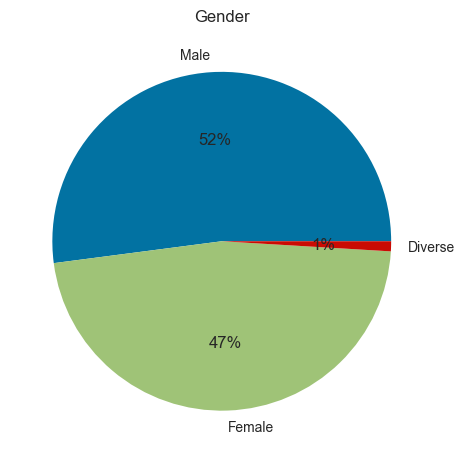

Male       164
Female     148
Diverse      3
Name: What is your gender?, dtype: int64


In [1332]:
gen = df["What is your gender?"].value_counts()
genspss = df[["Gender SPSS"]]
label = gen.index
plt.pie(gen, labels=label,autopct='%.0f%%')
plt.title("Gender")
plt.show()
print(gen)


<AxesSubplot:ylabel='In What country do you currently reside?,What is your gender?'>

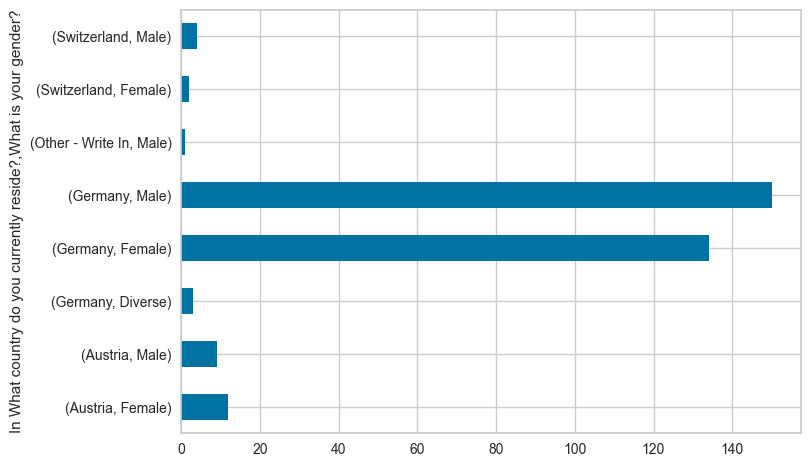

In [1333]:
df[["In What country do you currently reside?","What is your gender?"]].\
    groupby(["In What country do you currently reside?","What is your gender?"]).size().plot.barh()

<AxesSubplot:ylabel='In the past 30 days, how frequently did you go shopping?,What is your gender?'>

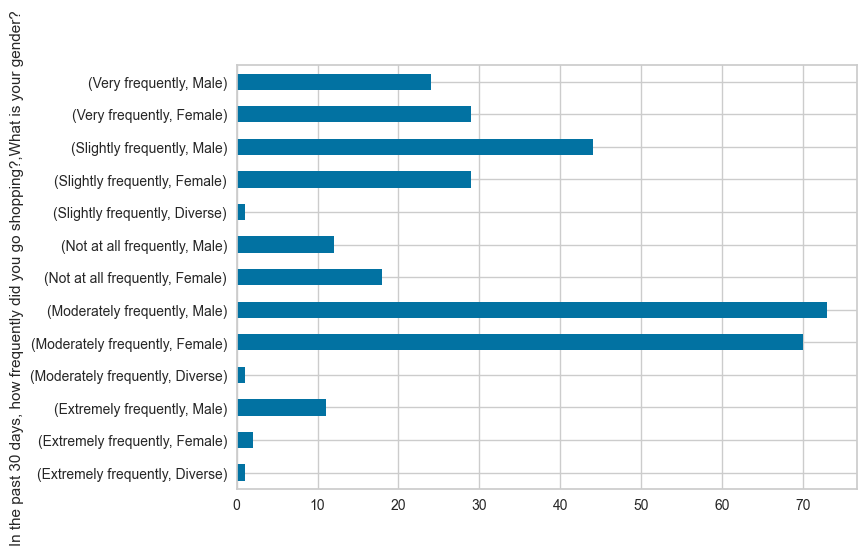

In [1334]:
df[["In the past 30 days, how frequently did you go shopping?","What is your gender?"]].\
    groupby(["In the past 30 days, how frequently did you go shopping?","What is your gender?"]).size().plot.barh()

<AxesSubplot:ylabel='What is your approximate average net income per month?,What is your gender?'>

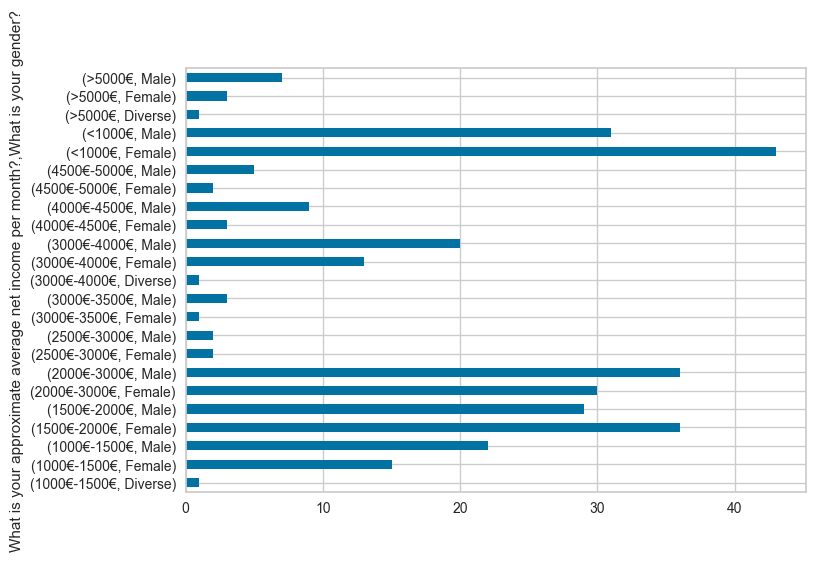

In [1335]:
df[["What is your approximate average net income per month?","What is your gender?"]].\
    groupby(["What is your approximate average net income per month?","What is your gender?"]).size().plot.barh()

More than 40 people said their income less than 1000 Euros per month

### Education 

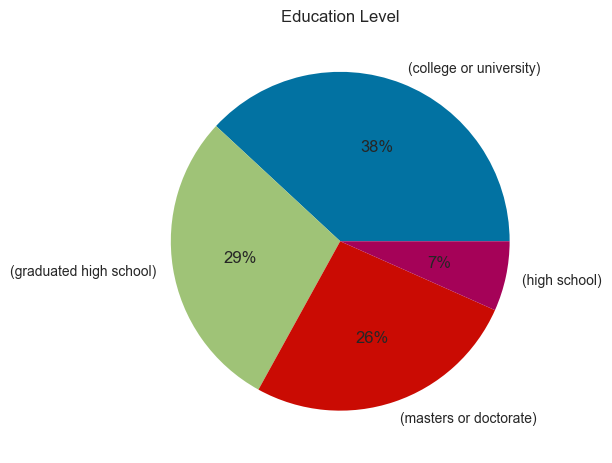

Some undergraduate education (college or university)       120
Completed secondary education (graduated high school)       91
Completed postgraduate education (masters or doctorate)     83
Some secondary education (high school)                      21
Name: What is your highest education level?, dtype: int64


In [1336]:
edu=df["What is your highest education level?"].value_counts()
label = ['(college or university)',
       '(graduated high school)',
       '(masters or doctorate)',
       '(high school)']
plt.pie(edu,labels=label,autopct='%.0f%%')
plt.title("Education Level")
plt.show()
print(edu)

### Country

Text(0.5, 1.0, 'The contries that where people joined survey')

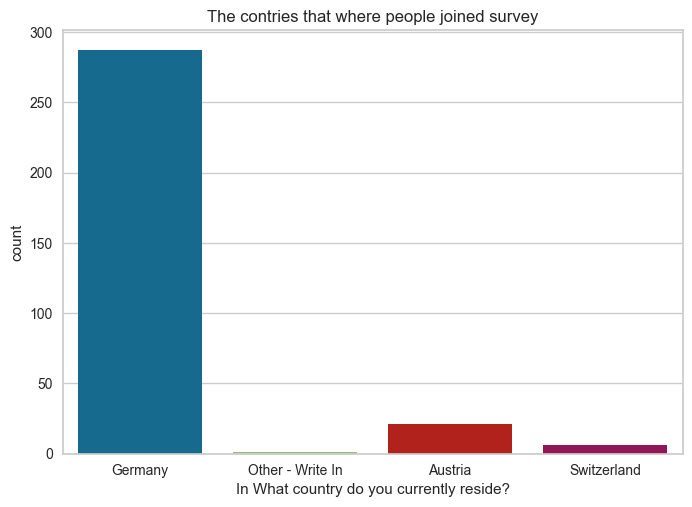

In [1337]:
sns.countplot(x = df["In What country do you currently reside?"], data=df)
plt.title("The contries that where people joined survey")    

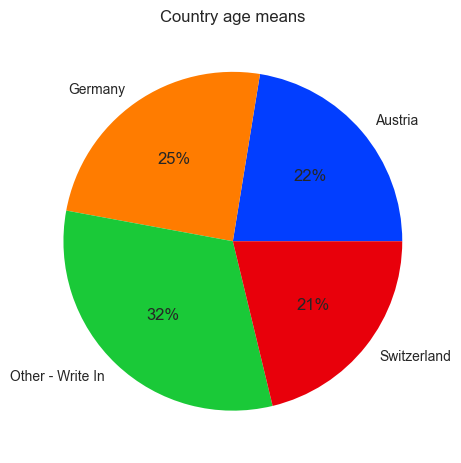

            country    agemean
0           Austria  34.000000
1           Germany  37.376307
2  Other - Write In  48.000000
3       Switzerland  32.166667


In [1338]:
pie_df = df.groupby(["In What country do you currently reside?"]).agg({"What is your age?":"mean"}).reset_index()
pie_df.columns= ["country","agemean"]
pie_data = pie_df["agemean"]
label = pie_df["country"]
colors = sns.color_palette('bright')[0:4]
plt.pie(pie_data, labels=label, colors=colors, autopct='%.0f%%')
plt.title("Country age means")
plt.show()
print(pie_df)

### Age

Distribution of Age

Text(0.5, 1.0, 'Distribution of age')

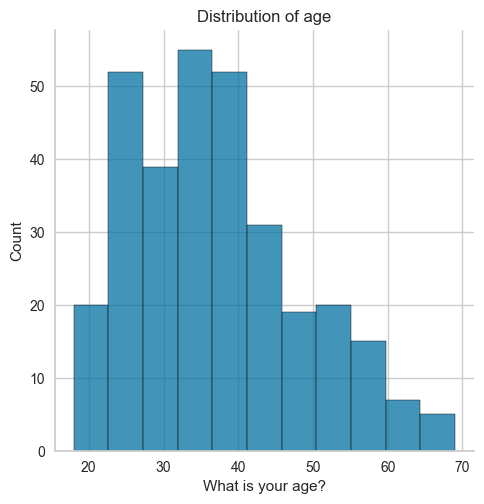

In [1339]:
sns.displot(df["What is your age?"])
plt.title("Distribution of age")

Relations between income and age

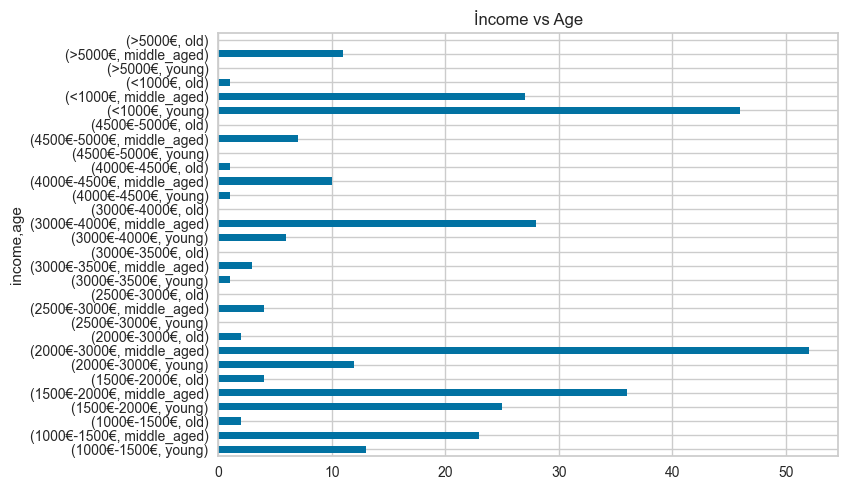

In [1340]:
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df["What is your age?"], bins=[0,30,60,100], labels=["young","middle_aged","old"])
    return df
age = get_num_people_by_age_category(df[["What is your age?"]])

agedf = pd.concat([df[["What is your approximate average net income per month?"]],age],axis=1)

agedf.drop("What is your age?",axis=1, inplace=True)
agedf.columns = ["income","age"]
df["age"]= agedf.iloc[:,1:]
agedf.groupby(["income","age"]).size().plot.barh()
plt.title("İncome vs Age")
plt.show()

### Normlity Analysis for Age

Hypothesis<br>


H0: The Age Distribution's is normal distribution<br>
H1: The Age Distribution's is not normal distribution

we have more than 50 entries so we should do kolmogorov simirnow test for normality analysis

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.


In [1341]:
# Normality test Age
import scipy.stats as ss
age = df["What is your age?"]
ss.kstest(age, "norm", alternative='two-sided')

KstestResult(statistic=1.0, pvalue=0.0)

As the p_value for the given problem is less than 0.05 which is the alpha value, we reject the null hypothesis and the alternative hypothesis is accepted.

The Age data is not normal distribution.


### Correlations

In the past 30 days, how frequently did you go shopping? vs Age

In [1342]:
pd.crosstab(index = df["In the past 30 days, how frequently did you go shopping?"],
columns = df["age"] )

age,young,middle_aged,old
"In the past 30 days, how frequently did you go shopping?",,,
Extremely frequently,4,10,0
Moderately frequently,50,89,5
Not at all frequently,7,20,3
Slightly frequently,23,50,1
Very frequently,20,32,1


Text(0.5, 1.0, 'In the past 30 days, how frequently did you go shopping vs AGE')

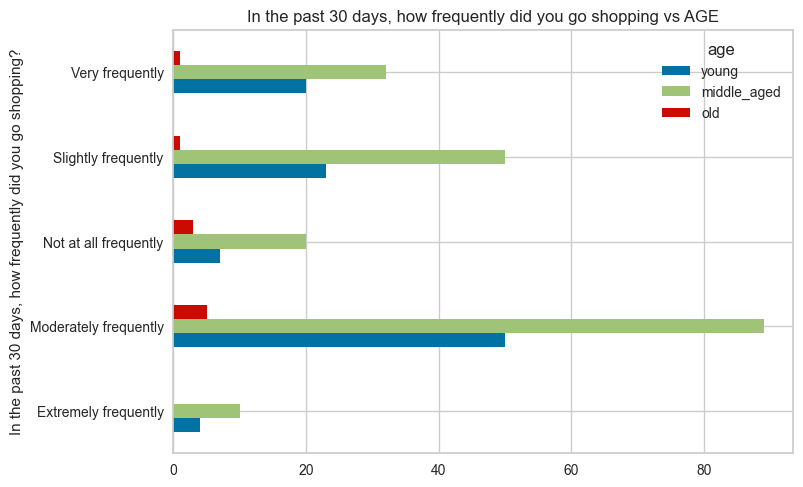

In [1343]:
pd.crosstab(index = df["In the past 30 days, how frequently did you go shopping?"],
columns = df["age"] ).plot.barh()
plt.title("In the past 30 days, how frequently did you go shopping vs AGE")

# Scenarios

normal shopping scenario (RSS), 

reality shopping scenario (ARSS),

reality shopping scenario with explainable AI features (XARSS).

(1) Strongly disagree; (2) Disagree; (3) Neither agree nor disagree; (4) Agree; (5) Strongly agree.

Seperating each scenario 

In [1344]:
RSS_cols = []
for i,values in enumerate(df.columns):
    RSS_cols.append(values)
    if values == df.columns[df.columns.str.contains('Total Purchase Intention - RSS')][0]:
        break

RSS = df[RSS_cols]


In [1345]:
ARSS_cols = []
for i,values in enumerate(df.columns[22:]):
    ARSS_cols.append(values)
    if values == df.columns[df.columns.str.contains('Total Trust in Application - ARSS')][0]:
        break
ARSS = df[ARSS_cols]

In [1346]:
XARSS_cols = []
for i,values in enumerate(df.columns[51:]):
    XARSS_cols.append(values)
    if values == df.columns[df.columns.str.contains('Total Trust in Application - EARSS')][0]:
        break
XARSS = df[XARSS_cols]


Scale likerts

In [1347]:
def likert_scale(df):
    bins = np.arange(6)
    likerts = ["Strongly disagree","Disagree", "Neither agree nor disagree","Agree","Strongly agree"]
    means = df.describe().T[["mean"]]
    means['likert'] = pd.cut(x = means['mean'], bins = bins, labels = likerts, include_lowest = True)
    return means

## normal shopping scenario (RSS)

In [1348]:
for i in RSS.columns:
    RSS[i] = RSS[i].astype('float64')

In [1349]:
RSS.describe().T

,count,mean,std,min,25%,50%,75%,max
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:,315.0,2.800000,0.910659,1.0,2.0,3.0,3.0,5.0
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:,315.0,2.844444,0.936482,1.0,2.0,3.0,3.0,5.0
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:,315.0,2.892063,0.910537,1.0,2.0,3.0,3.0,5.0
I find this scenario useful:After looking at the pictures please rate the following statements:,315.0,3.104762,0.880690,1.0,3.0,3.0,4.0,5.0
Total Usefulnes - RSS,315.0,3.114286,0.552602,1.0,3.0,3.0,3.0,5.0
The shown scenario is enjoyable:After looking at the pictures please rate the following statements:,315.0,2.892063,0.931286,1.0,2.0,3.0,3.0,5.0
The shown scenario is pleasing:After looking at the pictures please rate the following statements:,315.0,3.034921,0.834403,1.0,3.0,3.0,4.0,5.0
This scenario is entertaining:After looking at the pictures please rate the following statements:,315.0,2.634921,1.017390,1.0,2.0,3.0,3.0,5.0
Total Enjoyment - RSS,315.0,3.092063,0.559601,1.0,3.0,3.0,3.0,5.0
The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:,315.0,2.866667,0.984595,1.0,2.0,3.0,4.0,5.0


sorted likert scales

In [1350]:
rss_mean = likert_scale(RSS)
rss_mean.sort_values("mean",ascending = False)

,mean,likert
Total Purchase Intention - RSS,3.806349,Agree
Total Information - RSS,3.755556,Agree
I would intend to purchase products in this scenario in the near future:After looking at the pictures please rate the following statements:,3.171429,Agree
"If it would exist today, it is likely that I would purchase products in this scenario in the near future:After looking at the pictures please rate the following statements:",3.168254,Agree
I would expect to purchase products in this scenario in the near future if it would exist today:After looking at the pictures please rate the following statements:,3.155556,Agree
Total Usefulnes - RSS,3.114286,Agree
I find this scenario useful:After looking at the pictures please rate the following statements:,3.104762,Agree
This scenario supplies relevant information:After looking at the pictures please rate the following statements:,3.098413,Agree
Total Enjoyment - RSS,3.092063,Agree
I would definitely buy products in this scenario:After looking at the pictures please rate the following statements:,3.092063,Agree


## reality shopping scenario (ARSS)

In [1351]:
for i in ARSS.columns:
    ARSS[i] = ARSS[i].astype('float64')

In [1352]:
ARSS.describe().T

,count,mean,std,min,25%,50%,75%,max
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:.1,315.0,3.212698,1.032512,1.0,2.5,3.0,4.0,5.0
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:.1,315.0,3.177778,0.970987,1.0,2.5,3.0,4.0,5.0
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:.1,315.0,3.193651,1.027004,1.0,2.0,3.0,4.0,5.0
I find this scenario useful:After looking at the pictures please rate the following statements:.1,315.0,3.336508,1.010030,1.0,3.0,4.0,4.0,5.0
Total Usefulnes - ARSS,315.0,3.809524,0.639893,1.0,4.0,4.0,4.0,5.0
The shown scenario is enjoyable:After looking at the pictures please rate the following statements:.1,315.0,3.142857,0.991318,1.0,3.0,3.0,4.0,5.0
The shown scenario is pleasing:After looking at the pictures please rate the following statements:.1,315.0,3.111111,0.946181,1.0,2.0,3.0,4.0,5.0
This scenario is entertaining:After looking at the pictures please rate the following statements:.1,315.0,3.095238,1.036197,1.0,2.0,3.0,4.0,5.0
Total Entertainment - ARSS,315.0,3.771429,0.637328,1.0,4.0,4.0,4.0,5.0
The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:.1,315.0,3.330159,0.996272,1.0,3.0,3.0,4.0,5.0


sorted likert scales

In [1353]:
arss_mean = likert_scale(ARSS)
arss_mean.sort_values("mean",ascending = False)

,mean,likert
Total Information - ARSS,3.850794,Agree
Total Trust in Application - ARSS,3.822222,Agree
Total Usefulnes - ARSS,3.809524,Agree
Total Purchase Intention - ARSS,3.780952,Agree
Total Entertainment - ARSS,3.771429,Agree
This scenario supplies relevant information:After looking at the pictures please rate the following statements:.1,3.400000,Agree
I find this scenario useful:After looking at the pictures please rate the following statements:.1,3.336508,Agree
The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:.1,3.330159,Agree
This scenario is informative concerning the shown products:After looking at the pictures please rate the following statements:.1,3.326984,Agree
I feel that I have to be careful when using this application:After looking at the pictures please rate the following statements:,3.266667,Agree


## reality shopping scenario with explainable AI features (XARSS)

In [1354]:
for i in XARSS.columns:
    XARSS[i] = XARSS[i].astype('float64')

In [1355]:
XARSS.describe().T

,count,mean,std,min,25%,50%,75%,max
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:.2,315.0,3.346032,1.063707,1.0,3.0,4.0,4.0,5.0
This scenario can increase my shopping productivity:After looking at the pictures please rate the following statements:.2,315.0,3.273016,1.100840,1.0,3.0,3.0,4.0,5.0
This scenario can increase my shopping effectiveness:After looking at the pictures please rate the following statements:.2,315.0,3.314286,1.088278,1.0,3.0,3.0,4.0,5.0
I find this scenario useful:After looking at the pictures please rate the following statements:.2,315.0,3.431746,1.066697,1.0,3.0,4.0,4.0,5.0
Total Usefulnes - EARSS,315.0,3.888889,0.584053,1.0,4.0,4.0,4.0,5.0
The shown scenario is enjoyable:After looking at the pictures please rate the following statements:.2,315.0,3.171429,1.047811,1.0,3.0,3.0,4.0,5.0
The shown scenario is pleasing:After looking at the pictures please rate the following statements:.2,315.0,3.155556,0.973172,1.0,3.0,3.0,4.0,5.0
This scenario is entertaining:After looking at the pictures please rate the following statements:.2,315.0,3.187302,1.064705,1.0,3.0,3.0,4.0,5.0
Total Entertainment - EARSS,315.0,3.831746,0.618408,1.0,4.0,4.0,4.0,5.0
The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:.2,315.0,3.542857,0.967911,1.0,3.0,4.0,4.0,5.0


sorted likert scales

In [1356]:
xarss_mean = likert_scale(XARSS)
xarss_mean.sort_values("mean",ascending = False)

,mean,likert
Total Information - EARSS,3.939683,Agree
Total Usefulnes - EARSS,3.888889,Agree
Total Trust in Application - EARSS,3.850794,Agree
Total Entertainment - EARSS,3.831746,Agree
Total Purchase Intention - EARSS,3.790476,Agree
This scenario is informative concerning the shown products:After looking at the pictures please rate the following statements:.2,3.657143,Agree
This scenario supplies relevant information:After looking at the pictures please rate the following statements:.2,3.647619,Agree
The shown scenario offers a good source of product information:After looking at the pictures please rate the following statements:.2,3.542857,Agree
I find this scenario useful:After looking at the pictures please rate the following statements:.2,3.431746,Agree
This scenario can improve my shopping performance:After looking at the pictures please rate the following statements:.2,3.346032,Agree


Cronbach’s Alpha is a measure of reliability. To be exact, it tells us how internally consistent our scale is.

In [1357]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [1358]:
title = ["RSS", "ARSS","XARSS"]
for i,df in enumerate([RSS, ARSS, XARSS]):
    conc = cronbach_alpha(df)
    print(title[i]," = ",conc)

RSS  =  0.8223636396980889
ARSS  =  0.8748341755212675
XARSS  =  0.8737398920737031


The general rule of thumb is that a Cronbach's alpha of 0.80 and above is better. 

As we can see that Cronbach's alpha is for ARSS more than other scenarios. 

So, we can offer the ARSS to the cutomers.

### Compare the scenarios

In [1359]:
#pip install plot_likert

In [1360]:
import plot_likert

    
likerts = ["Strongly disagree","Disagree", "Neither agree nor disagree","Agree","Strongly agree"]

def condition(x):
    if x==1.0:
        return likerts[0]
    if x==2.0:
        return likerts[1]
    if x==3.0: 
        return likerts[2]
    if x==4.0:
        return likerts[3]
    if x==5.0:
        return likerts[4]

### Likerts Vizualization

Total Usefulnes Based Scenarios

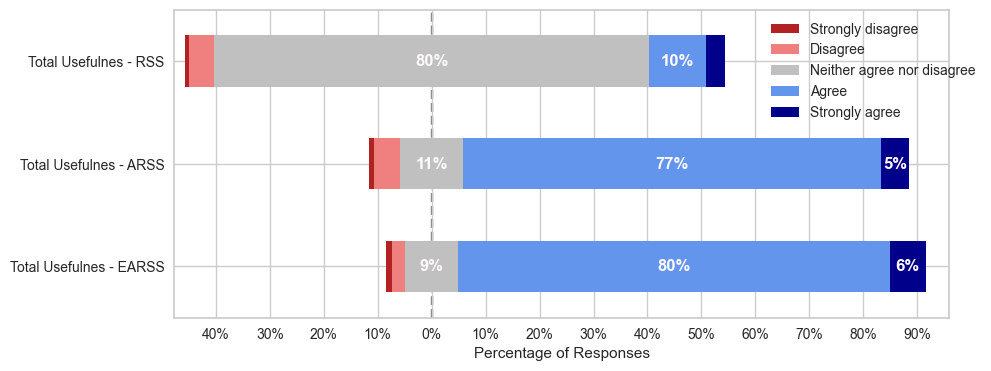

In [1361]:
df_RSS = RSS["Total Usefulnes - RSS"].apply(condition).to_frame()
df_ARSS = ARSS["Total Usefulnes - ARSS"].apply(condition).to_frame()
df_XARSS = XARSS["Total Usefulnes - EARSS"].apply(condition).to_frame()
concanate_df = pd.concat([df_RSS,df_ARSS,df_XARSS],axis=1)

plot_likert.plot_likert(concanate_df, plot_likert.scales.agree, plot_percentage=True,figsize=(10,4),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);

Total Purchase Intention Based Scenarios

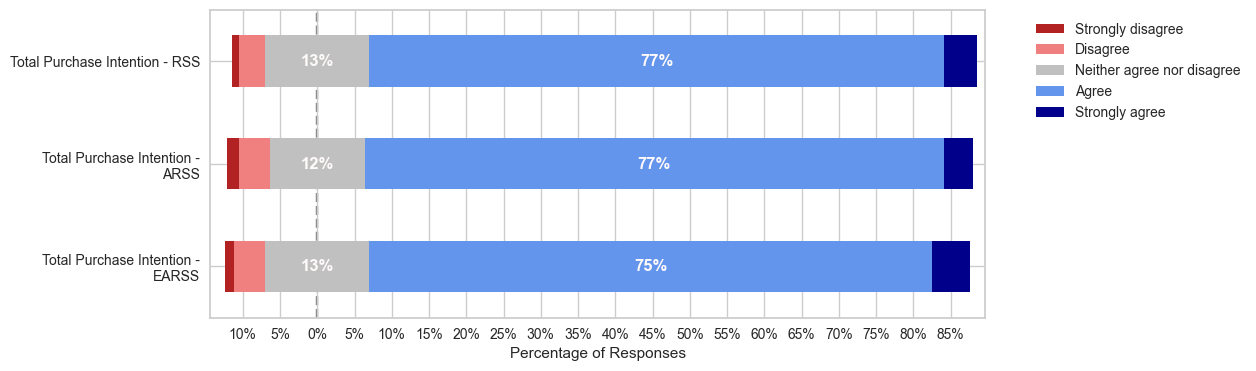

In [1362]:
df_RSS = RSS["Total Purchase Intention - RSS"].apply(condition).to_frame()
df_ARSS = ARSS["Total Purchase Intention - ARSS"].apply(condition).to_frame()
df_XARSS = XARSS["Total Purchase Intention - EARSS"].apply(condition).to_frame()
concanate_df = pd.concat([df_RSS,df_ARSS,df_XARSS],axis=1)

plot_likert.plot_likert(concanate_df, plot_likert.scales.agree, plot_percentage=True, figsize=(10,4),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);

Total Irritation Based Scenarios

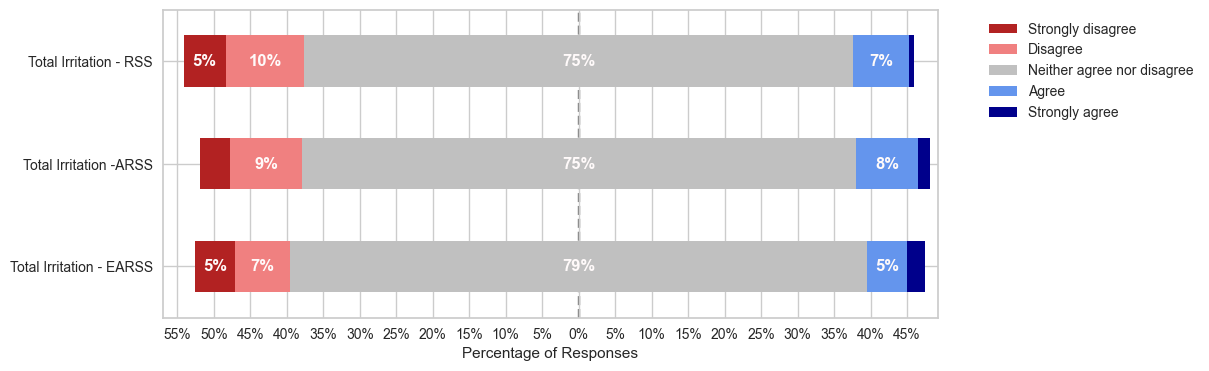

In [1363]:
df_RSS = RSS["Total Irritation - RSS"].apply(condition).to_frame()
df_ARSS = ARSS["Total Irritation -ARSS"].apply(condition).to_frame()
df_XARSS = XARSS["Total Irritation - EARSS"].apply(condition).to_frame()
concanate_df = pd.concat([df_RSS,df_ARSS,df_XARSS],axis=1)

plot_likert.plot_likert(concanate_df, plot_likert.scales.agree, plot_percentage=True, figsize=(10,4),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral);

# Modelling

### Cluster Analysis

We will clustering the scenarios

In [1364]:
#pip install yellowbrick
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

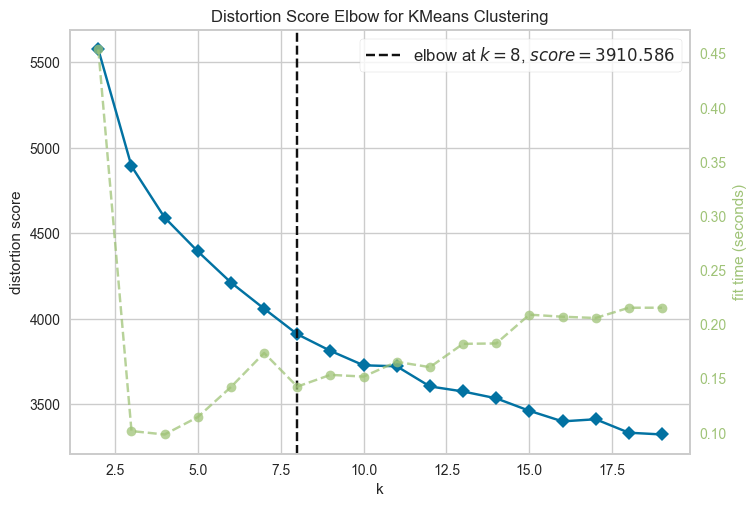

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1365]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20)) #It will be try between 2 and 20 iterations 
visu.fit(ARSS)
visu.poof()

Now, the number of clusters was determined as 8

we could set a model again 

In [1366]:
kmeans = KMeans(n_clusters = 8).fit(RSS)
clusters = kmeans.labels_
clusters

array([2, 7, 2, 4, 2, 6, 7, 2, 5, 5, 7, 0, 4, 1, 2, 2, 5, 5, 2, 4, 0, 0,
       0, 2, 7, 3, 5, 5, 1, 7, 4, 0, 2, 3, 0, 6, 6, 7, 0, 3, 0, 0, 2, 3,
       7, 4, 4, 2, 2, 0, 2, 0, 3, 7, 0, 0, 5, 5, 0, 1, 2, 7, 5, 4, 0, 0,
       4, 0, 6, 6, 2, 4, 4, 3, 7, 0, 5, 5, 2, 0, 4, 0, 4, 0, 6, 2, 3, 6,
       6, 0, 0, 0, 7, 5, 0, 6, 4, 0, 0, 0, 5, 4, 6, 0, 0, 6, 0, 4, 0, 0,
       3, 6, 2, 4, 6, 7, 2, 5, 2, 0, 5, 0, 2, 0, 2, 2, 6, 6, 5, 0, 6, 3,
       6, 2, 0, 4, 6, 5, 6, 0, 2, 3, 0, 3, 0, 5, 5, 4, 2, 0, 2, 6, 2, 2,
       3, 0, 2, 6, 7, 0, 0, 3, 5, 3, 7, 2, 5, 2, 0, 2, 4, 4, 3, 1, 0, 1,
       4, 5, 4, 1, 2, 0, 2, 1, 2, 6, 5, 2, 6, 3, 7, 7, 0, 4, 7, 6, 2, 7,
       7, 6, 4, 3, 2, 0, 0, 2, 2, 6, 7, 5, 6, 2, 5, 6, 3, 0, 3, 0, 0, 5,
       0, 4, 5, 4, 6, 2, 3, 4, 1, 3, 3, 5, 6, 0, 2, 0, 7, 0, 0, 6, 3, 6,
       7, 3, 4, 7, 6, 0, 3, 5, 7, 5, 6, 4, 0, 6, 6, 5, 5, 5, 1, 6, 5, 5,
       3, 5, 4, 3, 6, 6, 4, 3, 4, 3, 0, 7, 5, 7, 4, 4, 1, 0, 2, 1, 3, 6,
       4, 3, 5, 0, 6, 6, 2, 0, 6, 5, 3, 3, 6, 6, 5,

we can see that all customer's (135) clusters

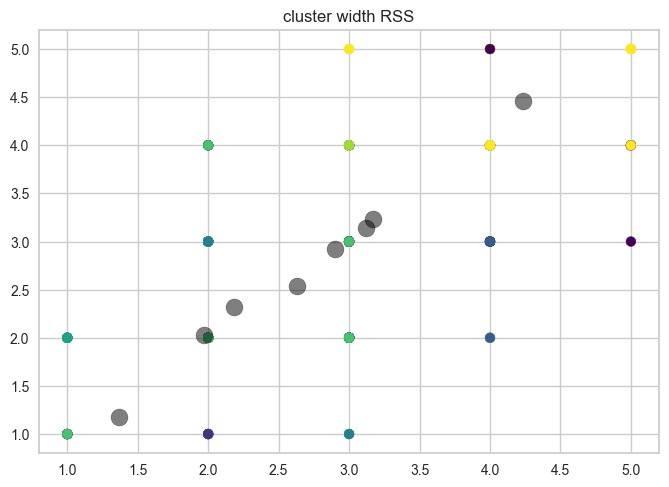

In [1367]:
plt.scatter(RSS.iloc[:,0], RSS.iloc[:,1],c = clusters, s=50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "black", s = 150, alpha = 0.5)
plt.title("cluster width RSS")
plt.show()

8 different cluster centers are displayed in the graph

### CLASSIFICATION

In [1368]:
#pip install catboost

In [1369]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

ARSS based gender classification 

In [1370]:
X = ARSS # Independent variables from ARSS table
y = genspss # Target variables from Gender SPSS table
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=42)

print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

X_train :  (267, 29)
X_test :  (48, 29)


MODEL

Logistic Regression

In [1371]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy for train set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy for test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


scores = cross_val_score(logreg, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


Accuracy for train set: 0.99
Accuracy for test set: 0.96
0.97 accuracy with a standard deviation of 0.01


Decision Tree

In [1372]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


print('Accuracy for train set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy for test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

scores = cross_val_score(clf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set: 1.00
Accuracy for test set: 0.98
0.95 accuracy with a standard deviation of 0.03


K-Nearest Neighbors

In [1373]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy for train set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy for test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

scores = cross_val_score(knn, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set: 0.98
Accuracy for test set: 0.96
0.97 accuracy with a standard deviation of 0.01


Gaussian Naive Bayes

In [1374]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy for train set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy for test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

#cross validation score
scores = cross_val_score(gnb, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set: 0.83
Accuracy for test set: 0.88
0.84 accuracy with a standard deviation of 0.05


Support Vector Machine

In [1375]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy for train set:  {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy for test set:  {:.2f}'
     .format(svm.score(X_test, y_test)))

#cross validation score

scores = cross_val_score(svm, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set:  0.98
Accuracy for test set:  0.96
0.97 accuracy with a standard deviation of 0.00


Adaboost

In [1376]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print('Accuracy for train set:  {:.2f}'
     .format(ab.score(X_train, y_train)))
print('Accuracy for test set:  {:.2f}'
     .format(ab.score(X_test, y_test)))

#cross validation score
scores = cross_val_score(ab, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set:  1.00
Accuracy for test set:  0.96
0.95 accuracy with a standard deviation of 0.03


Random Forest

In [1377]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy for train set:  {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy for test set:  {:.2f}'
     .format(rf.score(X_test, y_test)))

#cross validation score

scores = cross_val_score(rf, X, y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Accuracy for train set:  1.00
Accuracy for test set:  0.96
0.97 accuracy with a standard deviation of 0.01


What did we do?

Firstly we description the data and we printed inferential and descriptive statistics.

Secondly we preprocesed the data. (detection missings and fillings)

Thirdly we visualized the data.

Fourthly we compared the three scenarios

Finally we made machine learning (cluster analysis and clustering)

Outcome

We find the reality alpha of scenarios and we saw the ARSS scenarios reliability more than other scenarios with 0.875 alpha score.

Than we created all models with the ARSS. 

We determined our clusters, and we have classified: 

The models we use are: LinearRegression, LogisticRegression, SupportVectorMachine, KNearestNeighbors, DecisionTree,GaussianNB,Adaboost and RandomForest classifiers.

We have determined X data is ARSS  and target data is Age. And we splited data with 85% - 15%. We also use 10 Fold for cross validation.

Conclusions : For the classification model, the most suitable model SVM algorithm was chosen.

SVM

        Accuracy for train set:  0.98
        Accuracy for test set:  0.96

        #validation score
        
        0.97 accuracy with a standard deviation of 0.00

